In [2]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange, uniform
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# changing working directory
os.chdir("D:\Learning\Kaggle Projects\Kaggle_Github")

In [4]:
# importing the train dataset
df_train = pd.read_csv("train.csv")

In [5]:
# checking no of rows and columns
df_train.shape

(200000, 202)

In [6]:
# importing the test dataset
df_test = pd.read_csv("test.csv")

In [7]:
# checking no of rows and columns
df_test.shape

(200000, 201)

In [8]:
#converting datatype of target variable
df_train['target'] = df_train['target'].astype('category')

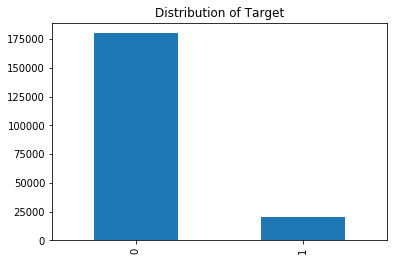

In [9]:
#checking data distribution in the target variable
df_train['target'].value_counts().plot(kind = 'bar', title = 'Distribution of Target')

#It is visible from below graph that data is not equalyy distributed

In [10]:
df_train['target'].value_counts()

#We can conclude that data is not uniformly distributed only 10% respondents are predicted as yes and 90% as no

0    179902
1     20098
Name: target, dtype: int64

In [11]:
#checking for missing values
missing_val = pd.DataFrame(df_train.isnull().sum())

#reshaping missing val dataframe
missing_val = missing_val.rename(columns = {'index' : 'Variable Names', 0 : 'Missing_Percent'})

#Calculating percentage
missing_val['Missing_Percent'] = (missing_val['Missing_Percent']) / len(df_train) * 100

In [12]:
#there is no missing values in our train data
missing_val.iloc[np.where(missing_val['Missing_Percent'] > 0)]

,Missing_Percent


In [13]:
#Checking correlation
corr = df_train.corr()

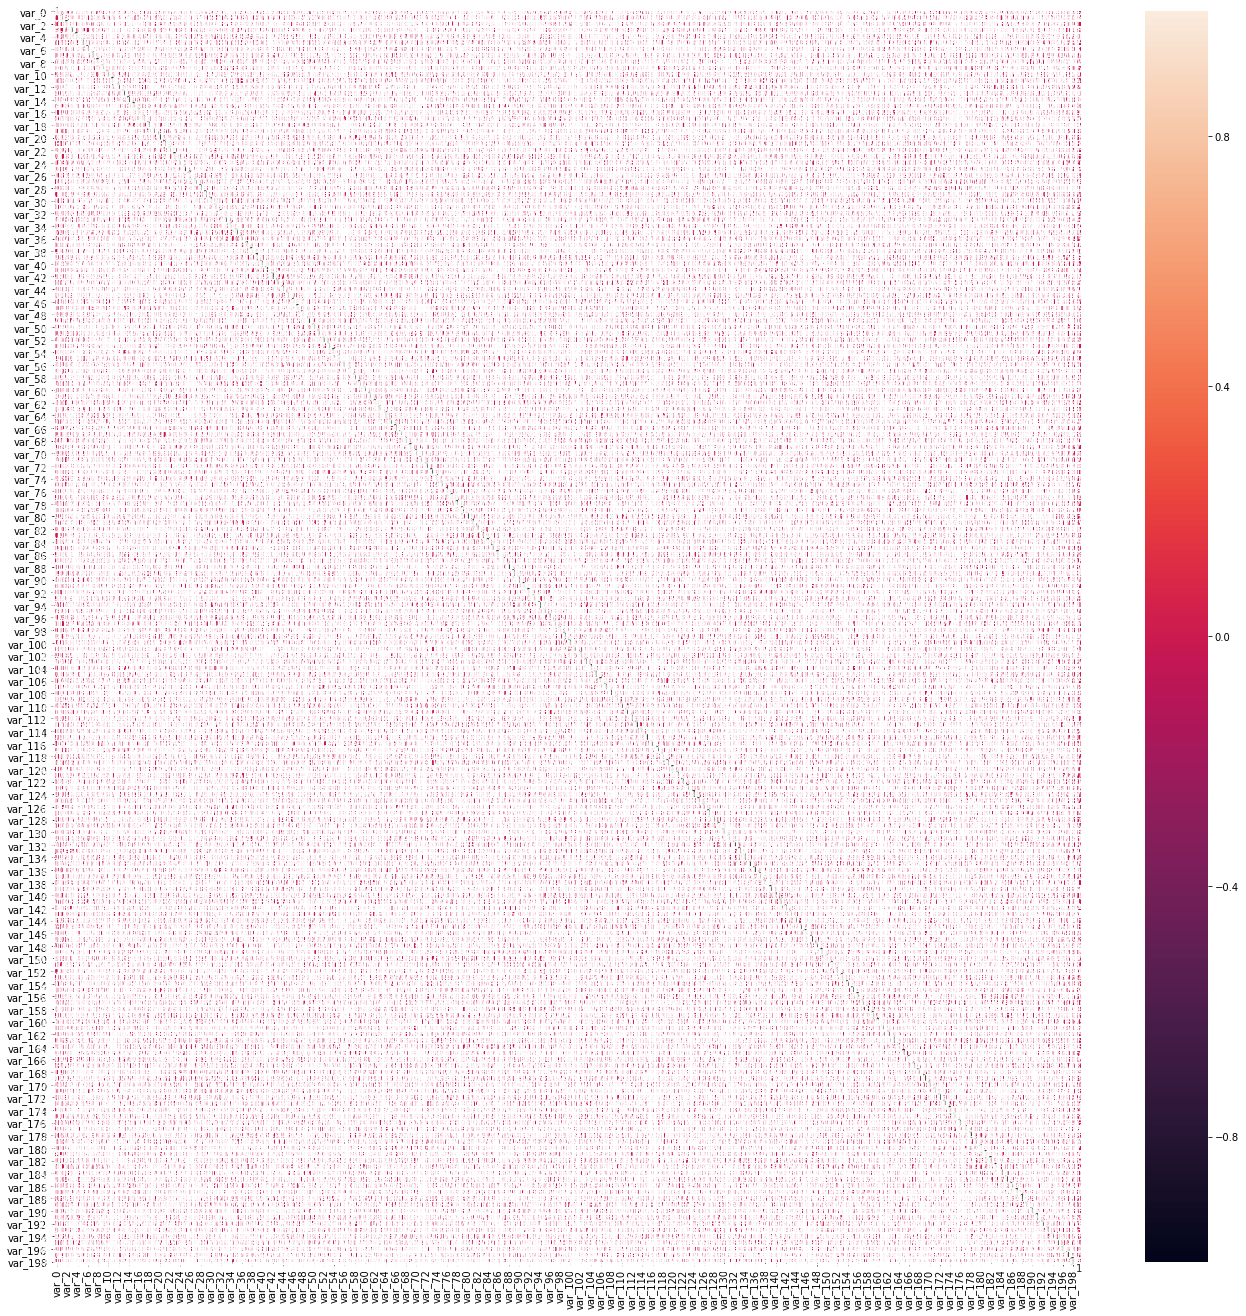

In [14]:
# Set the matplotlib figure 
fig, ax=plt.subplots(figsize=(23,23))
# Generate a custom diverging colormap
Cmap=sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap
Heatmap= sns.heatmap(corr,  ax=ax, annot=True, vmin=-1, linewidths=0.2)

In [16]:
# Proceeding for undersampling inorder to balance the data
df_train_equal = df_train.iloc[np.where(df_train['target'] == 1)]

In [25]:
df_train_0 = df_train.iloc[np.where(df_train['target'] == 0)]
df_train_0_v1 = df_train_0.iloc[0:20098,]
print(df_train_0_v1.shape)
print("_"*100)
print(df_train_equal.shape)

____________________________________________________________________________________________________
(20098, 202)
(20098, 202)


In [32]:
df_train_und_sam_bal = df_train_0_v1.copy()
df_train_und_sam_bal = df_train_und_sam_bal.append(df_train_equal)
print("After under sampling target feature distribution is \n{}".format(df_train_und_sam_bal['target'].value_counts()))
x = df_train_und_sam_bal.shape
print("-"*75)
print("Number of features is {}, number of observations is {}".format(x[1], x[0]))

After under sampling target feature distribution is 
1    20098
0    20098
Name: target, dtype: int64
---------------------------------------------------------------------------
Number of features is 202, number of observations is 40196


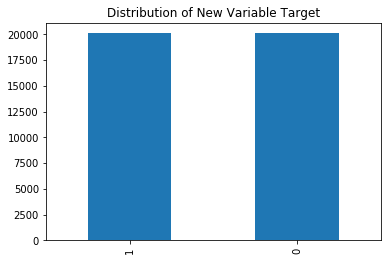

In [33]:
# Now ensuring our data is equally distributed
df_train_und_sam_bal['target'].value_counts().plot(kind = 'bar', title = 'Distribution of New Variable Target')

## Feature Scaling

In [38]:
df_train_und_sam_bal.drop(['ID_code'], axis = 1, inplace = True)

In [40]:
scaler = MinMaxScaler()
df_train_scaled_s = scaler.fit_transform(df_train_und_sam_bal)
df_train_scaled = pd.DataFrame(df_train_scaled_s, columns = df_train_und_sam_bal.columns)

In [41]:
df_train_scaled['target'].value_counts()

1.0    20098
0.0    20098
Name: target, dtype: int64

In [42]:
df_train_scaled['target'] = df_train_scaled['target'].astype(int)

In [43]:
df_train_scaled['target'].value_counts()

1    20098
0    20098
Name: target, dtype: int64

## Feature Selection

In [47]:
#Dividing Independent and Dependent features
Dependent_train = pd.DataFrame(df_train_scaled.iloc[:,0])
Independent_train = df_train_scaled.iloc[:,1:202]

In [48]:
best_feature = SelectKBest(score_func = chi2, k = 'all')
fit = best_feature.fit(Independent_train, Dependent_train)

scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(Independent_train.columns)

feature_scores = pd.concat([columns, scores], axis = 1)
feature_scores.columns = ['features', 'scores']

feature_scores.sort_values('scores', axis = 0, ascending = False, inplace = True)

In [49]:
print("Number of Selected Features : {}".format(len(feature_scores.iloc[np.where(feature_scores['scores'] > 10)])))

Number of Selected Features : 45


In [50]:
Selected_Features = pd.DataFrame(feature_scores.iloc[np.where(feature_scores['scores'] > 10)])

In [51]:
Selected_Features[['features_1','features_2']] = Selected_Features.features.str.split('_', expand = True)
Selected_Features['features_2'] = Selected_Features['features_2'].astype(int)
Selected_Features.sort_values('features_2', axis = 0, ascending = True, inplace = True)

In [52]:
Selected_Features

,features,scores,features_1,features_2
0,var_0,13.956815,var,0
1,var_1,17.348009,var,1
2,var_2,21.429192,var,2
6,var_6,20.055497,var,6
9,var_9,12.126138,var,9
12,var_12,31.798531,var,12
13,var_13,19.014503,var,13
21,var_21,17.432045,var,21
22,var_22,15.564373,var,22
26,var_26,19.705816,var,26


In [53]:
Selected_Features['features'].unique()

array(['var_0', 'var_1', 'var_2', 'var_6', 'var_9', 'var_12', 'var_13',
       'var_21', 'var_22', 'var_26', 'var_33', 'var_34', 'var_40',
       'var_44', 'var_53', 'var_75', 'var_76', 'var_78', 'var_80',
       'var_81', 'var_92', 'var_94', 'var_99', 'var_108', 'var_109',
       'var_110', 'var_115', 'var_123', 'var_127', 'var_133', 'var_139',
       'var_146', 'var_148', 'var_154', 'var_164', 'var_165', 'var_166',
       'var_169', 'var_170', 'var_174', 'var_177', 'var_184', 'var_190',
       'var_191', 'var_198'], dtype=object)

In [56]:
Independent_train_selected = Independent_train[Selected_Features['features']]
a = Independent_train_selected.shape
print("No of Observations : {}".format(a[0]))
print("No of Features : {}".format(a[1]))

No of Observations : 40196
No of Features : 45


## Train and Test data split

In [63]:
y = Dependent_train['target']
x_train, y_train, x_test, y_test = train_test_split(Independent_train, Dependent_train, test_size = 0.2, stratify = y)

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32156, 200)
(8040, 200)
(32156, 1)
(8040, 1)


## Logistic Regression

In [ ]:
logit = LogisticRegression().fit(x_train, x_test['target'])

In [67]:
logit_predictions = logit.predict(y_train)

In [71]:
#Build Confusion Matrix
CM_LR = pd.crosstab(y_test['target'], logit_predictions)
print(CM_LR)

col_0      0     1
target            
0       3133   887
1        873  3147


In [73]:
acc_rf_lr = accuracy_score(y_test['target'], logit_predictions)
print(acc_rf_lr)

0.7810945273631841


### Results After Hyper Parameter Optimization

In [76]:
logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

random = RandomizedSearchCV(logModel,
                            param_distributions=param_grid,
                            scoring='roc_auc',
                            cv = 3,
                            verbose=1,
                            n_jobs=-1)

random_result = random.fit(x_train, x_test['target'])

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.6s finished


Best Score:  0.8573721295735828
Best Params:  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 2500, 'C': 0.012742749857031334}


In [77]:
logit = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 2500, C = 0.012742749857031334).fit(x_train, x_test['target'])

In [79]:
LR_predictions = logit.predict(y_train)
CM_LR = pd.crosstab(y_test['target'], LR_predictions)
acc_LR = accuracy_score(y_test['target'], LR_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_LR))
print("Accuracy of Random Forest Model is : {}".format(acc_LR))

Confusion Matrix is as follows: 
col_0      0     1
target            
0       3129   891
1        883  3137
Accuracy of Random Forest Model is : 0.7793532338308458


In [83]:
#Classification report:-
classification_scores_LR=classification_report(y_test['target'], LR_predictions)
print(classification_scores_LR)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4020
           1       0.78      0.78      0.78      4020

    accuracy                           0.78      8040
   macro avg       0.78      0.78      0.78      8040
weighted avg       0.78      0.78      0.78      8040



ROC Score Logistic Regression: 0.7793532338308458




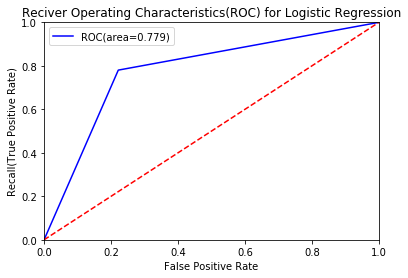

AUC: 0.7793532338308458


In [90]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_test['target'], LR_predictions)
print('ROC Score Logistic Regression:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test['target'], LR_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Logistic Regression')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

## XG Boost

In [91]:
from xgboost import XGBClassifier

In [92]:
classifier = XGBClassifier()
XGB_model = classifier.fit(x_train, x_test['target'])

In [93]:
XGB_predictions = XGB_model.predict(y_train)

In [94]:
#Build Confusion Matrix
CM_XGB = pd.crosstab(y_test['target'], XGB_predictions)

In [95]:
CM_XGB

col_0,0,1
target,,
0,3158,862
1,929,3091


In [96]:
TP = CM_XGB.iloc[1,1]
FP = CM_XGB.iloc[0,1]
FN = CM_XGB.iloc[1,0]
TN = CM_XGB.iloc[0,0]

In [97]:
# Check accuracy of the model
((TP+TN)*100) / (TP+FP+FN+TN)

77.72388059701493

## Results After Hyper Parameter Optimization

In [115]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [99]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600) 
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [100]:
classifier = XGBClassifier()
r_search = RandomizedSearchCV(classifier, param_distributions = params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

In [102]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
r_search.fit(x_train, x_test['target'])
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.9min finished



 Time taken: 0 hours 16 minutes and 19.83 seconds.


In [103]:
r_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
r_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [110]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGB_model = classifier.fit(x_train, x_test['target'])

In [111]:
XGB_predictions = XGB_model.predict(y_train)

In [112]:
CM_XGB = pd.crosstab(y_test['target'], XGB_predictions)
acc_XGB = accuracy_score(y_test['target'], XGB_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_XGB))
print("Accuracy of Random Forest Model is : {}".format(acc_XGB))

Confusion Matrix is as follows: 
col_0      0     1
target            
0       3202   818
1        965  3055
Accuracy of Random Forest Model is : 0.7782338308457711


In [113]:
#Classification report:-
classification_scores_xgb=classification_report(y_test['target'], XGB_predictions)
print(classification_scores_xgb)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4020
           1       0.79      0.76      0.77      4020

    accuracy                           0.78      8040
   macro avg       0.78      0.78      0.78      8040
weighted avg       0.78      0.78      0.78      8040



ROC Score Extreme Gradient Boosting: 0.7782338308457711




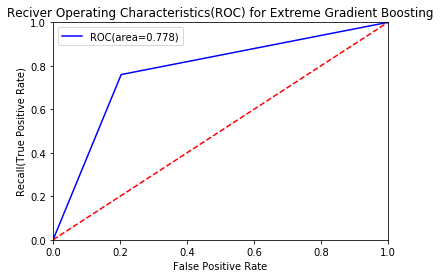

AUC: 0.7782338308457711


In [114]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_test['target'], XGB_predictions)
print('ROC Score Extreme Gradient Boosting:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test['target'], XGB_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Extreme Gradient Boosting')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

## Random Forest Model

In [116]:
# Building Random Forest Model
RF_model = RandomForestClassifier(n_estimators = 300).fit(x_train, x_test['target'])

In [118]:
RF_predictions = RF_model.predict(y_train)

In [120]:
#Build Confusion Matrix
CM_RF = pd.crosstab(y_test['target'], RF_predictions)
print(CM_RF)

col_0      0     1
target            
0       2988  1032
1        856  3164


In [123]:
acc_rf = accuracy_score(y_test['target'], RF_predictions)
print(acc_rf)

0.7651741293532338


## Results After Hyper Parameter Optimization

In [124]:
test = RandomForestClassifier(n_jobs = -1)
rf_p_dist = {'max_depth':[3,5,7,10, None],
             'n_estimators': [10,100,200,300,400,500,600,700],
             'max_features': randint(1,14),
             'criterion': ['gini','entropy'],
             'bootstrap': [True, False],
             'min_samples_leaf': randint(1,5)
            }

In [125]:
def hypertuning_rf(test, p_dist, nbr_iter, X, Y):
    rdmsearch = RandomizedSearchCV(test, param_distributions=p_dist, n_iter = nbr_iter, cv=9)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [126]:
rf_parameters, rf_ht_score = hypertuning_rf(test, rf_p_dist, 20, x_train, x_test['target'])

In [127]:
print(rf_parameters)
print(rf_ht_score)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 300}
0.7830264873825057


In [128]:
RF_model = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = 7, max_features = 2, min_samples_leaf = 2, n_estimators = 300).fit(x_train, x_test['target'])

In [129]:
RF_predictions = RF_model.predict(y_train)

In [130]:
CM_RF = pd.crosstab(y_test['target'], RF_predictions)
acc_rf = accuracy_score(y_test['target'], RF_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_RF))
print("Accuracy of Random Forest Model is : {}".format(acc_rf))

Confusion Matrix is as follows: 
col_0      0     1
target            
0       3255   765
1        984  3036
Accuracy of Random Forest Model is : 0.7824626865671642


In [132]:
#Classification report:-
classification_scores_rf=classification_report(y_test['target'], RF_predictions)
print(classification_scores_rf)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4020
           1       0.80      0.76      0.78      4020

    accuracy                           0.78      8040
   macro avg       0.78      0.78      0.78      8040
weighted avg       0.78      0.78      0.78      8040



ROC Score Random Forest: 0.7824626865671641




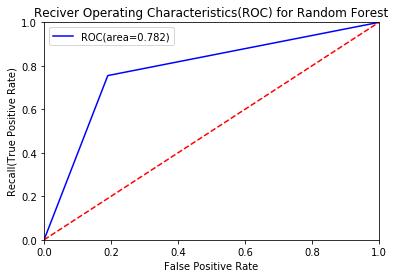

AUC: 0.7824626865671641


In [134]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_test['target'], RF_predictions)
print('ROC Score Random Forest:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test['target'], RF_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Random Forest')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

## Naive Bayes Algorithm

In [136]:
#Running Naive Bayes Algorithm
NB_model = GaussianNB().fit(x_train, x_test['target'])

In [137]:
#Predicting test data
NB_predictions = NB_model.predict(y_train)

In [138]:
#Build Confusion Matrix
CM_NB = pd.crosstab(y_test['target'], NB_predictions)
print(CM_NB)

col_0      0     1
target            
0       3265   755
1        790  3230


In [139]:
TN_NB = CM_NB.iloc[0,0]
TP_NB = CM_NB.iloc[1,1]
FP_NB = CM_NB.iloc[0,1]
FN_NB = CM_NB.iloc[1,0]

In [140]:
# Check accuracy of the model
((TP_NB+TN_NB)*100) / (TP_NB+FP_NB+FN_NB+TN_NB)

80.78358208955224

In [142]:
CM_NB = pd.crosstab(y_test['target'], NB_predictions)
acc_nb = accuracy_score(y_test['target'], NB_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_NB))
print("Accuracy of Random Forest Model is : {}".format(acc_nb))

Confusion Matrix is as follows: 
col_0      0     1
target            
0       3265   755
1        790  3230
Accuracy of Random Forest Model is : 0.8078358208955224


In [144]:
#Classification report:-
classification_scores_nb=classification_report(y_test['target'], NB_predictions)
print(classification_scores_nb)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4020
           1       0.81      0.80      0.81      4020

    accuracy                           0.81      8040
   macro avg       0.81      0.81      0.81      8040
weighted avg       0.81      0.81      0.81      8040



ROC Score Naive Bayes: 0.8078358208955224




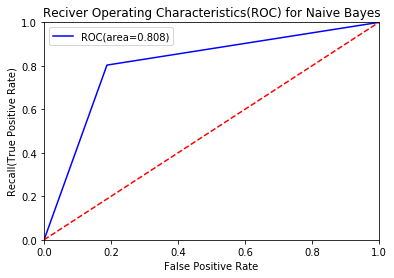

AUC: 0.8078358208955224


In [145]:
#ROC_AUC SCORE
roc_score_nb=roc_auc_score(y_test['target'], NB_predictions)
print('ROC Score Naive Bayes:',roc_score_nb)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test['target'], NB_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Naive Bayes')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)